In [1]:
from agents import TIME_LIMIT
# from creatures import vampire
# from creatures import leotris
from environments import square_room
from combat_handler import CombatHandler
from utils.agent_utils import calc_win_percentage

import dill
import numpy as np
import torch

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)


In [18]:
from agents import DoubleDQN
from agents import DoubleDuelingDQN
from agents import MCDoubleDuelingDQN
from agents import PPO
from agents import RangeAggression
from agents import RandomStrategy
from agents import SARSA

from actions import vampire_bite
from actions import arrow_shot
from actions import cataclysm
from actions import EndTurn
from actions import MoveLeft
from actions import MoveRight
from actions import MoveUp
from actions import MoveDown
from players import dungeon_master
from players import hayden
from utils.dnd_utils import roll_dice
from creatures import Creature

vampire = Creature(
    player=dungeon_master,
    name="Strahd",
    hit_points=200,
    armor_class=17,
    actions=[MoveLeft(), MoveRight(), MoveUp(), MoveDown(), vampire_bite],
    location=np.array([5, 5]),
    symbol="@",
    strategy=PPO()
)

leotris = Creature(
    player=hayden,
    name="Leotris",
    hit_points=25,
    armor_class=16,
    actions=[MoveLeft(), MoveRight(), MoveUp(), MoveDown(), arrow_shot],
    location=np.array([5, 10]),
    symbol="x",
    strategy=RandomStrategy()
)

In [19]:


def report_win_percentages(winner_list, num_games, combatants, total_rewards, last_states, num_actions_takens):
    """
    :return: None
    """
    win_percentages = calc_win_percentage(winner_list[-num_games:], combatants)
    last_states = torch.cat(last_states).data.numpy()
    print("Win percentages: {}\t".format(win_percentages))

    results = list(zip(winner_list[-num_games:], total_rewards[-num_games:], last_states, num_actions_takens))
    results = sorted(results, key=lambda x: -x[1])

    print("winner, avg_reward, last_state, num_actions_taken")
    for winner, avg_reward, last_state, num_actions_taken in results:
        print(" {}: {} ({}) \t\t{}".format(winner, avg_reward, last_state, num_actions_taken))
    print("----------------------\n")


def intialize_combatants(combatants, combat_handler):
    """
    :param combatants:
    :return:
    """
    [combatant.initialize(combat_handler) for combatant in combatants]


def main():
    """
    Todo: Provide main documentation/overview
    """
    print('Start')
    n_iters = int(500)

    winner_list = []
    total_rewards = []
    last_states = []
    num_actions_takens = []

    for i in range(n_iters):
#         if i%10==0:print(i)
        combat_handler = CombatHandler(
            environment=square_room,
            combatants=[leotris, vampire],
            time_limit=TIME_LIMIT
        )
        intialize_combatants([leotris, vampire], combat_handler=combat_handler)
        winner, total_reward, last_state, num_actions_taken = combat_handler.run()

        winner_list.append(winner)
        total_rewards.append(total_reward)
        last_states.append(last_state)
        num_actions_takens.append(num_actions_taken)

        if (i + 1) % 10 == 0:
            print(i+1 , " of ",n_iters)
            report_win_percentages(
                winner_list=winner_list,
                num_games=10,
                combatants=[leotris, vampire],
                total_rewards=total_rewards,
                last_states=last_states,
                num_actions_takens=num_actions_takens
            )
            last_states = []
            num_actions_takens = []

        # Save tabular Q
        if (i + 1) % 10 == 0:
            dill.dump(winner_list, open("results/winner_list_{}.pickle".format(leotris.strategy.name), "wb"))
#             dill.dump(leotris.strategy.policy_net, open("results/model_{}.pickle".format(leotris.strategy.name), "wb"))
            dill.dump(total_rewards, open('results/reward_list_{}.pickle'.format(leotris.strategy.name), "wb"))


In [20]:
main()

Start
10  of  500
Win percentages: {'Strahd': 1.0, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([-0.4    0.835  0.1    0.6    0.1    0.7    0.     0.667  0.041]) 		61
 Strahd: 0 ([-0.04   0.915  0.3    0.6    0.3    0.7    1.     0.333  0.039]) 		58
 Strahd: 0 ([-0.56   0.4    0.6    0.7    0.7    0.7    1.     0.     0.149]) 		224
 Strahd: 0 ([-0.4    0.09   0.7    0.7    0.7    0.6    0.     1.     0.356]) 		534
 Strahd: 0 ([-0.76   0.875  0.7    0.7    0.7    0.8    0.     1.     0.036]) 		54
 Strahd: 0 ([-0.32   0.7    0.5    0.8    0.4    0.8    1.     1.     0.113]) 		170
 Strahd: 0 ([-0.6    0.895  0.6    0.8    0.6    0.7    1.     0.833  0.07 ]) 		105
 Strahd: 0 ([-0.72   0.72   0.5    0.6    0.6    0.6    0.     1.     0.103]) 		154
 Strahd: 0 ([-0.64   0.885  0.5    0.8    0.4    0.8    0.     0.833  0.047]) 		71
 Strahd: 0 ([-0.44   0.54   0.5    0.8

90  of  500
Win percentages: {'Strahd': 0.8, 'Leotris': 0.2, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([0.    0.92  0.4   0.7   0.3   0.7   0.    1.    0.005]) 		7
 Strahd: 0 ([-0.72   0.82   0.7    0.7    0.7    0.8    0.     0.667  0.083]) 		124
 Strahd: 0 ([-0.88   0.835  0.4    0.7    0.3    0.7    0.     1.     0.035]) 		53
 Strahd: 0 ([-0.88   0.895  0.3    0.7    0.3    0.8    0.     1.     0.019]) 		29
 Leotris: 0 ([ 1.    -0.01   0.3    0.8    0.7    0.8    1.     0.833  0.369]) 		553
 Strahd: 0 ([-0.76  0.92  0.3   0.7   0.3   0.8   0.    1.    0.03]) 		45
 Strahd: 0 ([-0.24   0.55   0.5    0.7    0.5    0.6    0.     1.     0.335]) 		502
 Leotris: 0 ([ 1.    -0.015  0.2    0.3    0.2    0.6    1.     1.     0.409]) 		613
 Strahd: 0 ([-0.4    0.235  0.6    0.7    0.7    0.7    1.     0.5    0.367]) 		551
 Strahd: 0 ([0.  1.  0.6 0.7 0.7 0.7 0.  1.  

170  of  500
Win percentages: {'Strahd': 1.0, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([-0.44   0.715  0.4    0.7    0.5    0.7    0.     1.     0.115]) 		172
 Strahd: 0 ([-0.16   0.88   0.7    0.8    0.6    0.8    1.     0.     0.091]) 		137
 Strahd: 0 ([-0.64   0.635  0.8    0.2    0.8    0.3    1.     0.333  0.106]) 		159
 Strahd: 0 ([-0.76   0.88   0.6    0.3    0.6    0.4    1.     0.667  0.042]) 		63
 Strahd: 0 ([-0.52   0.715  0.8    0.4    0.7    0.4    1.     1.     0.143]) 		214
 Strahd: 0 ([-0.32   0.89   0.7    0.6    0.6    0.6    0.     0.833  0.02 ]) 		30
 Strahd: 0 ([-0.72   0.98   0.6    0.7    0.6    0.8    0.     1.     0.035]) 		52
 Strahd: 0 ([-0.96   0.74   0.7    0.5    0.8    0.5    0.     1.     0.101]) 		152
 Strahd: 0 ([-0.52   0.765  0.6    0.4    0.7    0.4    0.     0.833  0.098]) 		147
 Strahd: 0 ([-0.68   0.87   0.3    0.6    

250  of  500
Win percentages: {'Strahd': 0.9, 'Leotris': 0.1, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([-0.36   0.85   0.5    0.8    0.6    0.8    0.     1.     0.089]) 		134
 Strahd: 0 ([-0.64   0.89   0.3    0.7    0.4    0.7    0.     1.     0.042]) 		63
 Strahd: 0 ([-0.08  1.    0.3   0.7   0.4   0.7   0.    1.    0.  ]) 		0
 Strahd: 0 ([-0.4    0.965  0.2    0.5    0.2    0.6    1.     0.     0.023]) 		35
 Strahd: 0 ([-0.4    0.93   0.5    0.5    0.4    0.5    0.     1.     0.029]) 		43
 Leotris: 0 ([ 0.12  -0.015  0.3    0.8    0.8    0.7    1.     1.     0.475]) 		712
 Strahd: 0 ([0.    0.55  0.7   0.4   0.6   0.4   0.    1.    0.201]) 		301
 Strahd: 0 ([-0.72   0.62   0.6    0.8    0.7    0.8    0.     1.     0.107]) 		160
 Strahd: 0 ([-0.04   1.     0.6    0.8    0.7    0.8    1.     0.667  0.003]) 		5
 Strahd: 0 ([-0.6    0.405  0.5    0.8    0.4  

330  of  500
Win percentages: {'Strahd': 0.8, 'Leotris': 0.2, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([-1.04   0.64   0.5    0.7    0.5    0.8    0.     0.333  0.129]) 		194
 Strahd: 0 ([0.    0.77  0.4   0.8   0.5   0.8   0.    0.833 0.094]) 		141
 Strahd: 0 ([-0.4    0.43   0.4    0.8    0.3    0.8    1.     0.     0.157]) 		236
 Leotris: 0 ([ 0.44 -0.05  0.1   0.2   0.2   0.4   1.    1.    0.4 ]) 		600
 Leotris: 0 ([1.    0.    0.3   0.4   0.5   0.7   1.    1.    0.391]) 		587
 Strahd: 0 ([-0.16   0.2    0.4    0.5    0.3    0.5    0.     1.     0.333]) 		500
 Strahd: 0 ([-0.44   0.855  0.6    0.7    0.6    0.8    0.     1.     0.07 ]) 		105
 Strahd: 0 ([-0.68   0.74   0.3    0.8    0.2    0.8    0.     0.833  0.092]) 		138
 Strahd: 0 ([-0.12   1.     0.3    0.7    0.3    0.8    0.     1.     0.002]) 		3
 Strahd: 0 ([0.    0.9   0.2   0.8   0.3   0.8   1

410  of  500
Win percentages: {'Strahd': 1.0, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Strahd: 0 ([-0.72   0.125  0.5    0.4    0.5    0.5    1.     0.333  0.321]) 		482
 Strahd: 0 ([0.  1.  0.5 0.4 0.5 0.5 0.  1.  0. ]) 		0
 Strahd: 0 ([-0.04   1.     0.5    0.4    0.5    0.5    0.     1.     0.001]) 		1
 Strahd: 0 ([-0.12   0.595  0.8    0.7    0.8    0.8    0.     1.     0.145]) 		218
 Strahd: 0 ([-0.44   0.735  0.7    0.5    0.8    0.5    0.     1.     0.148]) 		222
 Strahd: 0 ([-0.08   0.23   0.4    0.6    0.3    0.6    0.     1.     0.359]) 		539
 Strahd: 0 ([0.    0.475 0.7   0.5   0.8   0.5   0.    1.    0.181]) 		272
 Strahd: 0 ([-0.8    0.565  0.8    0.6    0.8    0.7    0.     1.     0.145]) 		217
 Strahd: 0 ([-0.12   0.165  0.4    0.6    0.5    0.6    0.     1.     0.303]) 		455
 Strahd: 0 ([-0.2    0.945  0.2    0.8    0.1    0.8    1.     0.667  0.035]) 	

490  of  500
Win percentages: {'Leotris': 0.1, 'Strahd': 0.9, <creatures.Creature object at 0x000001FE9BB18C88>: 0, <creatures.Creature object at 0x000001FE9BB189E8>: 0}	
winner, avg_reward, last_state, num_actions_taken
 Leotris: 0 ([0.08  0.    0.5   0.1   0.8   0.6   1.    0.833 0.395]) 		593
 Strahd: 0 ([-0.96   0.32   0.7    0.7    0.8    0.7    0.     1.     0.318]) 		477
 Strahd: 0 ([-0.36   1.     0.7    0.7    0.8    0.7    0.     1.     0.001]) 		1
 Strahd: 0 ([-0.92   0.94   0.5    0.8    0.5    0.7    0.     1.     0.028]) 		42
 Strahd: 0 ([-0.32   0.095  0.8    0.8    0.8    0.7    0.     1.     0.324]) 		486
 Strahd: 0 ([-0.28   0.495  0.4    0.7    0.5    0.7    1.     0.     0.264]) 		396
 Strahd: 0 ([-0.44   0.6    0.5    0.4    0.4    0.4    0.     0.667  0.191]) 		287
 Strahd: 0 ([-0.28   0.33   0.7    0.6    0.6    0.6    0.     0.333  0.289]) 		434
 Strahd: 0 ([-0.44  0.84  0.8   0.5   0.8   0.6   1.    1.    0.05]) 		75
 Strahd: 0 ([-0.44   0.8    0.6    0.5    0.

In [ ]:
# Check

In [6]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import torch
import numpy as np

In [7]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    try:
        dist, value = policy_net(state)
        action_probs = dist.probs.data.numpy()[0]
    except:
        action_probs = policy_net(state).detach().numpy().reshape(-1)


    actions = list(zip(action_names, action_probs))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        action_names[int(np.argmax(action_probs))]
    ))


Number of games played: 500
0
creature plot


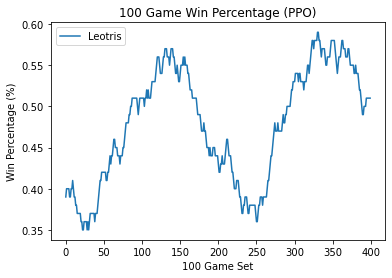

In [8]:
model_name = 'PPO'
winner_list = dill.load(open("results/winner_list_{}.pickle".format(model_name), "rb"))

batch_size = 100
win_pcts = defaultdict(list)
avg_rewards = list()

creatures = ["Leotris"]  #, "Strahd", "Timeout"]

print("Number of games played: {}".format(len(winner_list)))

# Graph win percentage:
for i in range(0, len(winner_list) - batch_size):
    if i%50000==0:print(i)
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
print('creature plot')
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage ({})".format(batch_size, model_name))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.savefig('results/{}.png'.format(model_name))
plt.show()

# reward_list = dill.load(open("results/reward_list_{}.pickle".format(model_name), "rb"))
# # Graph reward:
# for i in range(0, len(reward_list) - batch_size):
#     batch_reward_list = reward_list[i:(i+batch_size)]
#     avg_reward = np.mean(batch_reward_list)
#     avg_rewards.append(avg_reward)
    
# plt.plot(range(len(avg_rewards)), avg_rewards)
# plt.title("Average Rewards")
# plt.ylabel("Average Reward")
# plt.xlabel("{} Game Set".format(batch_size))
# plt.show()